In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


Duplicate key in file 'C:\\Users\\AnhNQ\\.matplotlib\\matplotlibrc' line #623.


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(5)

id      賃料                所在地  \
0   1   75000        東京都北区滝野川３丁目   
1   2   76000        東京都中央区月島３丁目   
2   3  110000        東京都渋谷区笹塚２丁目   
3   4  150000  東京都杉並区高円寺南２丁目23-2   
4   5   74000     東京都葛飾区金町３丁目7-2   

                                                アクセス   間取り      築年数   方角  \
0  都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...    1K    9年9ヶ月   南東   
1  都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...    1R  44年10ヶ月  NaN   
2  京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...    1K    8年6ヶ月    南   
3  総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...  2LDK   29年4ヶ月    南   
4  京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...   2DK   31年7ヶ月    南   

        面積       所在階                                             バス・トイレ  \
0  20.01m2   1階／12階建   専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座   
1   16.5m2   5階／10階建                              専用トイレ／\tシャワー／\t温水洗浄便座   
2  22.05m2  12階／15階建  専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...   
3  60.48m2    3階／4階建     専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立   
4  39.66m2    1階／2階建               専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能   

                              キッチン                                 放送・通信  \
0  ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯    インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ   
1          ガスコンロ／\tシステムキッチン\t／\t給湯                             インターネット対応   
2  ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯  インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ   
3                       ガスコンロ／\t給湯                    インターネット対応／\t光ファイバー   
4                      給湯／\t独立キッチン                                   NaN   

                                                室内設備  \
0  エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...   
1  エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...   
2  エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...   
3  エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...   
4                バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水   

                                                 駐車場  \
0                                            駐輪場\t空有   
1                         駐輪場\t空有\t駐車場\t無\tバイク置き場\t無   
2  駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m   
3                          駐車場\t無\t駐輪場\t無\tバイク置き場\t無   
4    駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無   

                                                周辺環境          建物構造  \
0  【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...  RC（鉄筋コンクリート）   
1                                       【スーパー】 1283m           鉄骨造   
2  【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m  RC（鉄筋コンクリート）   
3  【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...  RC（鉄筋コンクリート）   
4  【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...            木造   

                     契約期間  
0                     2年間  
1                     2年間  
2                     2年間  
3  2年間\t※この物件は\t定期借家\tです。  
4                     2年間

In [3]:
train = train.rename(columns={'賃料':'Rent', '契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})
test = test.rename(columns={'契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})

In [4]:
train.shape, test.shape

((31470, 17), (31262, 16))

In [5]:
train.head(3)

id    Rent     Location                                             Access  \
0   1   75000  東京都北区滝野川３丁目  都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...   
1   2   76000  東京都中央区月島３丁目  都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...   
2   3  110000  東京都渋谷区笹塚２丁目  京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...   

  Type      Age Direction     Area     Floor  \
0   1K    9年9ヶ月        南東  20.01m2   1階／12階建   
1   1R  44年10ヶ月       NaN   16.5m2   5階／10階建   
2   1K    8年6ヶ月         南  22.05m2  12階／15階建   

                                                Bath  \
0   専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座   
1                              専用トイレ／\tシャワー／\t温水洗浄便座   
2  専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...   

                           Kitchen                              Internet  \
0  ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯    インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ   
1          ガスコンロ／\tシステムキッチン\t／\t給湯                             インターネット対応   
2  ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯  インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ   

                                            Facility  \
0  エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...   
1  エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...   
2  エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...   

                                             Parking  \
0                                            駐輪場\t空有   
1                         駐輪場\t空有\t駐車場\t無\tバイク置き場\t無   
2  駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m   

                                            Surround      Material Contract  
0  【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...  RC（鉄筋コンクリート）      2年間  
1                                       【スーパー】 1283m           鉄骨造      2年間  
2  【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m  RC（鉄筋コンクリート）      2年間

In [6]:
#train_test_data = pd.concat([train, test], sort=False).reset_index(drop=True)
train_test_data = [train, test]# combining train and test dataset
for dataset in train_test_data:
    dataset['City'] = dataset['Location'].str.extract('(千代田区|中央区|港区|新宿区|文京区|'
                                                 '台東区|墨田区|江東区|品川区|目黒区|'
                                                 '大田区|世田谷区|渋谷区|中野区|杉並区|'
                                                 '豊島区|北区|荒川区|板橋区|練馬区|足立区|葛飾区|江戸川区)')

In [7]:
train[['City', 'Rent']].groupby(['City'], as_index=False).mean().sort_values(by="Rent",ascending=False)

City           Rent
16    港区  214061.744878
4   千代田区  182706.236324
1    中央区  180887.865520
15   渋谷区  171839.786802
17   目黒区  145674.389052
10   新宿区  130573.957482
9    文京区  128562.070628
5    台東区  127625.944206
14   江東区  126217.110743
6    品川区  124609.473270
19   荒川区  116817.881944
7    墨田区  116201.346535
0   世田谷区  113781.270261
21   豊島区  110916.884343
8    大田区  106981.675000
2    中野区  101578.398018
3     北区   99506.602871
11   杉並区   97708.174675
18   練馬区   92724.943493
12   板橋区   90003.879310
13  江戸川区   86592.302585
22   足立区   85872.540849
20   葛飾区   79114.657591

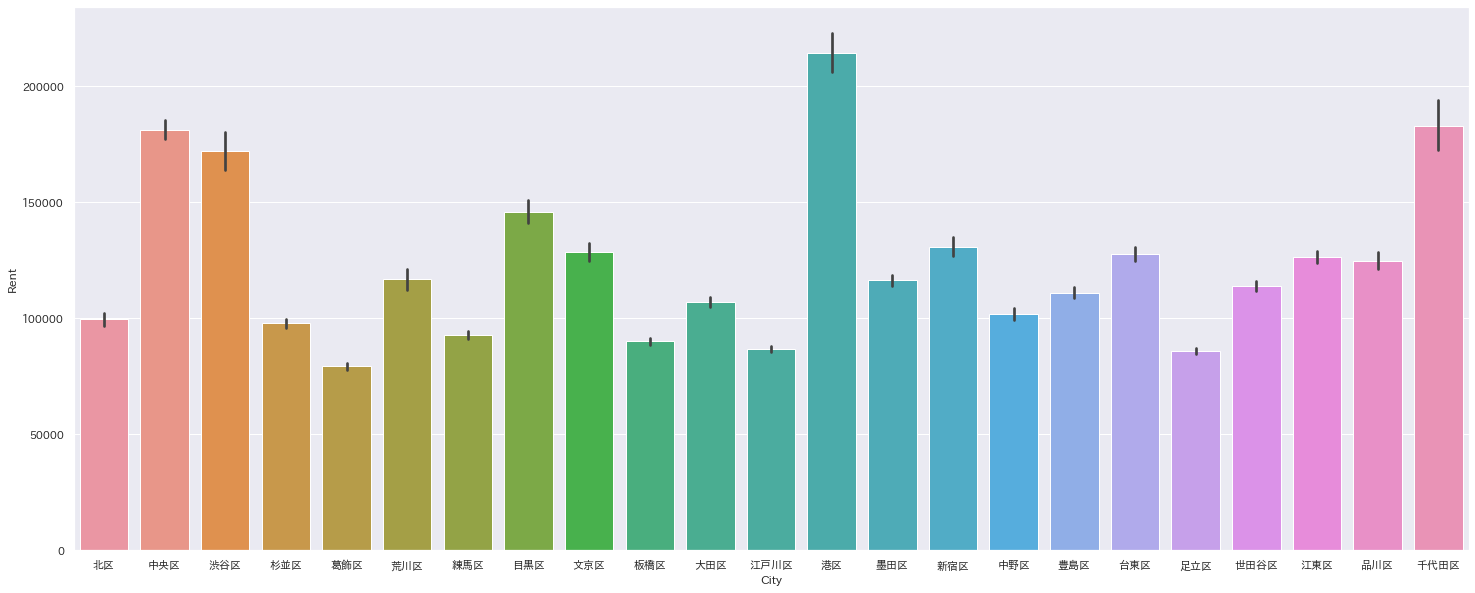

In [8]:
sns.set(font='IPAexGothic')
plt.figure(figsize=(25,10))
sns.barplot(x=train['City'],y=train['Rent'],data=train)

In [9]:
for dataset in train_test_data:
    dataset['Station'] = dataset['Access'].str.extract('([\u4E00-\u9FAF|\u3040-\u3096|\u30A1-\u30FA|\uFF66-\uFF9D|\u31F0-\u31FF]*)駅')

In [10]:
train[['Station','Rent']].groupby(['Station'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

Station           Rent
384   青山一丁目  547000.000000
333     虎ノ門  420000.000000
242     永田町  407500.000000
405      麹町  405000.000000
40      乃木坂  342543.478261
112     外苑前  325166.666667
93      半蔵門  317621.621622
294     神谷町  305547.619048
62      代官山  294111.111111
244      汐留  282538.461538

In [11]:
for dataset in train_test_data:
    dataset['Line'] = dataset['Access'].str.extract('([\u4E00-\u9FAF|\u3040-\u3096|\u30A1-\u30FA|\uFF66-\uFF9D|\u31F0-\u31FF]*)線').fillna('山手	')

In [12]:
train[['Line','Rent']].groupby(['Line'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

Line           Rent
28   東北新幹  212000.000000
0    りんかい  194802.631579
56     銀座  189117.097625
46    総武本  167023.502304
19     南北  160161.913897
26    日比谷  157606.178404
52  都営大江戸  153072.305097
23     山手  150575.635104
27    有楽町  149743.818100
33   東急東横  143593.856767

In [13]:
for dataset in train_test_data:
    dataset['MinWalk'] = dataset['Access'].str.extract('((?<=徒歩).+?(?=分))').astype(int)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


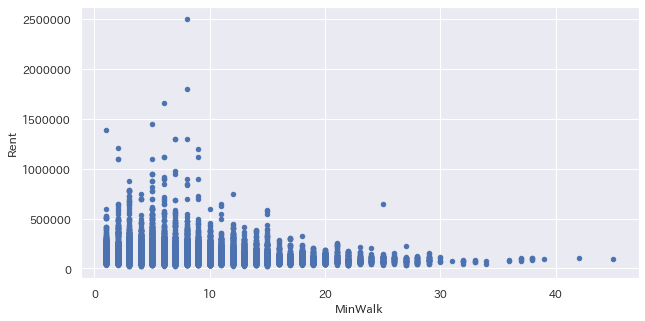

In [14]:
train.plot.scatter(
    x="MinWalk", 
    y="Rent", 
    figsize = (10, 5)
)

In [15]:
train['MinWalk'].value_counts()

5     3859
8     2820
3     2760
4     2715
7     2706
6     2639
10    2561
9     2168
2     1807
12    1175
1     1113
11     999
13     927
15     862
14     670
17     304
18     280
16     263
20     199
19     160
22      82
23      82
21      72
25      59
24      41
27      32
26      29
29      28
28      27
32       6
30       5
38       4
37       4
33       4
36       2
34       2
39       1
42       1
45       1
31       1
Name: MinWalk, dtype: int64

In [16]:
train[['MinWalk','Rent']].groupby(['MinWalk'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

MinWalk           Rent
0         1  133106.091644
1         2  129289.728832
2         3  126990.969928
4         5  126507.136564
3         4  125807.425414
5         6  125109.245926
7         8  120992.301773
8         9  115518.258303
6         7  114301.947524
11       12  112107.297872

In [17]:
for dataset in train_test_data:
    dataset['MinBus'] = dataset['Access'].str.extract('((?<=バス\().+?(?=分\)))').fillna('0').astype(int)

In [18]:
train['MinBus'].value_counts()

0     30479
15      120
10       92
20       75
12       70
11       46
18       44
14       42
13       41
9        39
17       38
7        35
8        34
5        31
16       30
19       28
25       21
6        19
21       19
24       18
23       18
26       16
27       14
22       12
30       10
29        9
35        7
4         7
28        6
2         6
40        6
3         5
34        5
33        5
32        4
39        3
44        3
36        2
58        2
1         2
52        1
43        1
50        1
38        1
45        1
56        1
31        1
Name: MinBus, dtype: int64

In [19]:
train[['MinBus','Rent']].groupby(['MinBus'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

MinBus           Rent
45      56  175000.000000
39      40  160666.666667
4        4  135642.857143
37      38  135000.000000
44      52  134000.000000
5        5  127967.741935
0        0  118966.578398
21      21  117194.736842
30      30  112600.000000
13      13  112097.560976

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


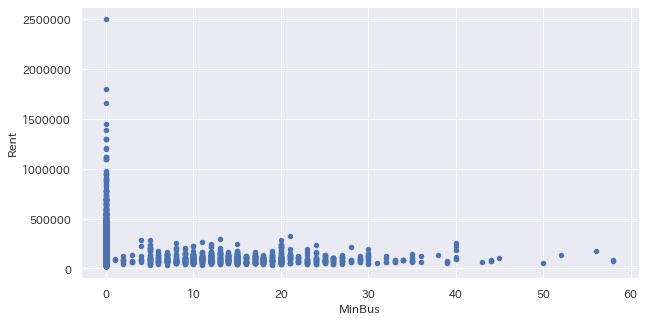

In [20]:
train.plot.scatter(
    x="MinBus", 
    y="Rent", 
    figsize = (10, 5)
)

In [21]:
for dataset in train_test_data:
    dataset['R'] = dataset['Type'].str.extract('([0-9])').fillna('2').astype(int)
    dataset['K'] = dataset['Type'].str.extract('(K)')
    dataset['L'] = dataset['Type'].str.extract('(L)')
    dataset['D'] = dataset['Type'].str.extract('(D)')
    dataset['S'] = dataset['Type'].str.extract('(S)')

In [22]:
for dataset in train_test_data:
    dataset['K'] = dataset['K'].apply(lambda x: 1 if x == 'K' else 0)
    dataset['D'] = dataset['D'].apply(lambda x: 1 if x == 'D' else 0)
    dataset['L'] = dataset['L'].apply(lambda x: 1 if x == 'L' else 0)
    dataset['S'] = dataset['S'].apply(lambda x: 1 if x == 'S' else 0)

In [23]:
train[['id','R','K','D','L','S']].groupby(['id','R'],as_index=False).mean().head(10)


id  R  K  D  L  S
0   1  1  1  0  0  0
1   2  1  0  0  0  0
2   3  1  1  0  0  0
3   4  2  1  1  1  0
4   5  2  1  1  0  0
5   6  2  1  1  1  0
6   7  1  1  0  0  0
7   8  1  1  0  0  0
8   9  2  1  1  0  0
9  10  1  1  1  0  0

In [24]:
train['StationCount'] = train['Access'].map(lambda x: x.count('駅'))
train['LineCount'] = train['Access'].map(lambda x: x.count('線'))
test['StationCount'] = test['Access'].map(lambda x: x.count('駅'))
test['LineCount'] = test['Access'].map(lambda x: x.count('線'))

In [25]:
train[['id','StationCount','LineCount']].groupby(['id','StationCount'],as_index=False).mean().head(10)

id  StationCount  LineCount
0   1             3          3
1   2             3          3
2   3             3          3
3   4             3          4
4   5             3          3
5   6             3          3
6   7             4          3
7   8             3          3
8   9             3          3
9  10             3          3

In [26]:
train['Age'].value_counts()

0年1ヶ月      983
新築         889
0年0ヶ月      704
0年2ヶ月      644
0年3ヶ月      508
          ... 
57年1ヶ月       1
58年4ヶ月       1
63年5ヶ月       1
65年11ヶ月      1
61年9ヶ月       1
Name: Age, Length: 746, dtype: int64

In [27]:
#train['Age'].map(lambda x: x.split('年')[-1].split('ヶ月')[0]).unique()

In [28]:
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].str.replace('0年([0-9])*ヶ月', '1年', regex=True)
    dataset['Age'] = dataset['Age'].str.replace('新築', '0年', regex=True)

In [29]:
train['Age'].value_counts()

1年         4508
0年          889
31年         850
11年         725
21年         435
           ... 
53年9ヶ月        1
55年6ヶ月        1
63年5ヶ月        1
58年11ヶ月       1
68年7ヶ月        1
Name: Age, Length: 673, dtype: int64

In [30]:
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].str.extract('([0-9]*年)')
    dataset['Age'] = dataset['Age'].str.extract('([0-9]*)').fillna('2').astype(int)

In [31]:
train['Age'].value_counts()

1      5503
11     1948
31     1513
12     1226
13     1075
       ... 
66        1
521       1
119       1
71        1
79        1
Name: Age, Length: 68, dtype: int64

In [32]:
train['Direction'].fillna('南',inplace=True)

In [33]:
train[['Direction', 'Rent']].groupby(['Direction'], as_index=False).mean()

Direction           Rent
0         北  126057.842319
1        北東  127517.737320
2        北西  135791.875566
3         南  110610.190084
4        南東  131210.768238
5        南西  126737.894481
6         東  113991.111311
7         西  116873.421510

In [34]:
for dataset in train_test_data:
    dataset['Area'] = dataset['Area'].str.extract('(-?\d+\.?\d*)')

In [35]:
train[['Area', 'Rent']].groupby(['Area'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

Area       Rent
1194  217.29  2500000.0
591   151.81  1800000.0
2444   341.3  1660000.0
1397  232.01  1450000.0
408   138.99  1390000.0
1296  223.71  1300000.0
694   167.99  1300000.0
320      125  1300000.0
689   163.62  1200000.0
500   144.35  1120000.0

In [36]:
train['Area'] = train['Area'].astype(float)
test['Area'] = test['Area'].astype(float)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


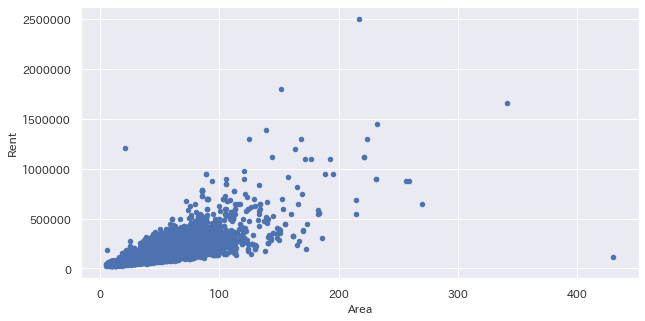

In [37]:
train.plot.scatter(
    x="Area", 
    y="Rent", 
    figsize = (10, 5)
)

In [38]:
train.isnull().sum()

id                 0
Rent               0
Location           0
Access             0
Type               0
Age                0
Direction          0
Area               0
Floor              0
Bath             329
Kitchen          621
Internet        3440
Facility          82
Parking         5287
Surround        9432
Material           0
Contract        7120
City               0
Station            0
Line               0
MinWalk            0
MinBus             0
R                  0
K                  0
L                  0
D                  0
S                  0
StationCount       0
LineCount          0
dtype: int64

In [39]:
train['Floor'].value_counts()

2階／2階建            2851
1階／2階建            2771
2階／3階建            2017
3階／3階建            1805
1階／3階建            1640
                  ... 
8階／58階建（地下2階）        1
2階／2階建（地下4階）         1
13階／14階建（地下2階）       1
19階／38階建（地下2階）       1
45階／49階建（地下2階）       1
Name: Floor, Length: 1032, dtype: int64

In [40]:
for dataset in train_test_data:
    dataset['FloorTh'] = dataset['Floor'].str.extract(r'(\d+)?階\W', expand=False).fillna('0').astype(int)
    dataset['FloorNum'] = dataset['Floor'].str.extract(r'(\d+)?階建', expand=False).fillna('0').astype(int)
    dataset['UndergroundTh'] = dataset['Floor'].str.extract(r'^地下(\d+)?階', expand=False).fillna('0').astype(int)
    dataset['UndergroundNum'] = dataset['Floor'].str.extract(r'（地下(\d+)?階）', expand=False).fillna('0').astype(int)
    

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 33 columns):
id                31470 non-null int64
Rent              31470 non-null int64
Location          31470 non-null object
Access            31470 non-null object
Type              31470 non-null object
Age               31470 non-null int32
Direction         31470 non-null object
Area              31470 non-null float64
Floor             31470 non-null object
Bath              31141 non-null object
Kitchen           30849 non-null object
Internet          28030 non-null object
Facility          31388 non-null object
Parking           26183 non-null object
Surround          22038 non-null object
Material          31470 non-null object
Contract          24350 non-null object
City              31470 non-null object
Station           31470 non-null object
Line              31470 non-null object
MinWalk           31470 non-null int32
MinBus            31470 non-null int32
R              

In [42]:
bath_type = train['Bath'].dropna().str.split('／').sum()
bath_type = [n.replace('\t', '') for n in bath_type]
bath_type = list(set(bath_type))

In [43]:
train.join(pd.DataFrame(columns=bath_type))

id    Rent           Location  \
0          1   75000        東京都北区滝野川３丁目   
1          2   76000        東京都中央区月島３丁目   
2          3  110000        東京都渋谷区笹塚２丁目   
3          4  150000  東京都杉並区高円寺南２丁目23-2   
4          5   74000     東京都葛飾区金町３丁目7-2   
...      ...     ...                ...   
31465  31466   80000        東京都板橋区蓮根２丁目   
31466  31467   54500  東京都世田谷区太子堂５丁目17-1   
31467  31468  125000        東京都江東区南砂４丁目   
31468  31469   98000        東京都中野区中野２丁目   
31469  31470   81000        東京都豊島区千川２丁目   

                                                  Access  Type  Age Direction  \
0      都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...    1K    9        南東   
1      都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...    1R   44         南   
2      京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...    1K    8         南   
3      総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...  2LDK   29         南   
4      京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...   2DK   31         南   
...                                                  ...   ...  ...       ...   
31465  都営三田線\t蓮根駅\t徒歩7分\t\t都営三田線\t西台駅\t徒歩10分\t\t都営三田線...   2DK   31         南   
31466  東急田園都市線\t三軒茶屋駅\t徒歩6分\t\t東急世田谷線\t西太子堂駅\t徒歩4分\t\...    1R   39         西   
31467  東西線\t南砂町駅\t徒歩5分\t\t都営新宿線\t大島(東京都)駅\t徒歩26分\t\t東...   3DK   45         南   
31468  中央線（快速）\t中野(東京都)駅\t徒歩4分\t\t丸ノ内線(池袋－荻窪)\t新中野駅\t...   1DK   11         南   
31469  有楽町線\t千川駅\t徒歩5分\t\t有楽町線\t要町駅\t徒歩13分\t\t西武池袋線\t...    1K   61        南東   

        Area     Floor                                               Bath  \
0      20.01   1階／12階建   専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座   
1      16.50   5階／10階建                              専用トイレ／\tシャワー／\t温水洗浄便座   
2      22.05  12階／15階建  専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...   
3      60.48    3階／4階建     専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立   
4      39.66    1階／2階建               専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能   
...      ...       ...                                                ...   
31465  37.90    1階／3階建       専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t洗面台独立   
31466  12.04    4階／4階建                                専用バス／\t専用トイレ／\tシャワー   
31467  60.00    3階／5階建                     バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座   
31468  29.59    1階／2階建              専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立   
31469  25.00    2階／3階建                      専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー   

                               Kitchen                              Internet  \
0      ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯    インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ   
1              ガスコンロ／\tシステムキッチン\t／\t給湯                             インターネット対応   
2      ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯  インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ   
3                           ガスコンロ／\t給湯                    インターネット対応／\t光ファイバー   
4                          給湯／\t独立キッチン                                   NaN   
...                                ...                                   ...   
31465               ガスコンロ／\tコンロ2口／\t給湯                             インターネット対応   
31466               ガスコンロ／\tコンロ1口／\t給湯                                   NaN   
31467                    ガスコンロ／\tコンロ2口                                光ファイバー   
31468          ガスコンロ／\tシステムキッチン\t／\t給湯             インターネット対応／\t光ファイバー／\tCATV   
31469                       ガスコンロ／\t給湯                             高速インターネット   

                                                Facility  \
0      エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...   
1      エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...   
2      エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...   
3      エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...   
4                    バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水   
...                                                  ...   
31465                エアコン付\tバルコニー／\t室内洗濯機置場\t公営水道／\t都市ガス   
31466  エアコン付\tバルコニー／\tフローリング／\t室外洗濯機置場／\tタイル張り\t公営水道／...   
31467          シューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場\t都市ガス   
31468  エアコン付\tシューズボックス／\tバルコニー／\tフ

In [44]:
#bath_type

In [45]:
for dataset in train_test_data:
    dataset['privatetoilet'] = dataset['Bath'].str.extract('(専用トイレ)')
    dataset['privatebath'] = dataset['Bath'].str.extract('(専用バス)')
    dataset['warmseat'] = dataset['Bath'].str.extract('(温水洗浄便座)')
    dataset['nobath'] = dataset['Bath'].str.extract('(バスなし)')
    dataset['shower'] = dataset['Bath'].str.extract('(シャワー)')
    dataset['dryer'] = dataset['Bath'].str.extract('(浴室乾燥機)')
    dataset['notoilet'] = dataset['Bath'].str.extract('(トイレなし)')
    dataset['bathtoilet'] = dataset['Bath'].str.extract('(バス・トイレ別)')
    dataset['memorial'] = dataset['Bath'].str.extract('(追焚機能)')
    dataset['sharedbath'] = dataset['Bath'].str.extract('(共同バス)')
    dataset['washstand'] = dataset['Bath'].str.extract('(洗面台独立)')
    dataset['dressing'] = dataset['Bath'].str.extract('(脱衣所)')
    dataset['sharedtoilet'] = dataset['Bath'].str.extract('(共同トイレ)')


In [46]:
for dataset in train_test_data:
    dataset['privatetoilet'] = dataset['privatetoilet'].apply(lambda x: True if x == '専用トイレ' else False)
    dataset['privatebath'] = dataset['privatebath'].apply(lambda x: True if x == '専用バス' else False)
    dataset['warmseat'] = dataset['warmseat'].apply(lambda x: True if x == '温水洗浄便座' else False)
    dataset['nobath'] = dataset['nobath'].apply(lambda x: True if x == 'バスなし' else False)
    dataset['shower'] = dataset['shower'].apply(lambda x: True if x == 'シャワー' else False)
    dataset['dryer'] = dataset['dryer'].apply(lambda x: True if x == '浴室乾燥機' else False)
    dataset['notoilet'] = dataset['notoilet'].apply(lambda x: True if x == 'トイレなし' else False)
    dataset['bathtoilet'] = dataset['bathtoilet'].apply(lambda x: True if x == 'バス・トイレ別' else False)
    dataset['memorial'] = dataset['memorial'].apply(lambda x: True if x == '追焚機能' else False)
    dataset['sharedbath'] = dataset['sharedbath'].apply(lambda x: True if x == '共同バス' else False)
    dataset['washstand'] = dataset['washstand'].apply(lambda x: True if x == '洗面台独立' else False)
    dataset['dressing'] = dataset['dressing'].apply(lambda x: True if x == '脱衣所' else False)
    dataset['sharedtoilet'] = dataset['sharedtoilet'].apply(lambda x: True if x == '共同トイレ' else False)

In [47]:
for dataset in train_test_data:
    dataset['freeusage'] = dataset['Internet'].str.extract('(インターネット使用料無料)')
    dataset['cable'] = dataset['Internet'].str.extract('(有線放送)')
    dataset['csantenna'] = dataset['Internet'].str.extract('(CSアンテナ)')
    dataset['catv'] = dataset['Internet'].str.extract('(CATV)')
    dataset['opticalfiber'] = dataset['Internet'].str.extract('(光ファイバー)')
    dataset['internetcompatible'] = dataset['Internet'].str.extract('(インターネット対応)')
    dataset['bsantenna'] = dataset['Internet'].str.extract('(BSアンテナ)')
    dataset['highspeed'] = dataset['Internet'].str.extract('(高速インターネット)')

In [48]:
for dataset in train_test_data:
    dataset['freeusage'] = dataset['freeusage'].apply(lambda x: True if x == 'インターネット使用料無料' else False)
    dataset['cable'] = dataset['cable'].apply(lambda x: True if x == '有線放送' else False)
    dataset['csantenna'] = dataset['csantenna'].apply(lambda x: True if x == 'CSアンテナ' else False)
    dataset['catv'] = dataset['catv'].apply(lambda x: True if x == 'CATV' else False)
    dataset['opticalfiber'] = dataset['opticalfiber'].apply(lambda x: True if x == '光ファイバー' else False)
    dataset['internetcompatible'] = dataset['internetcompatible'].apply(lambda x: True if x == 'インターネット対応' else False)
    dataset['bsantenna'] = dataset['bsantenna'].apply(lambda x: True if x == 'BSアンテナ' else False)
    dataset['highspeed'] = dataset['highspeed'].apply(lambda x: True if x == '高速インターネット' else False)


In [49]:
for dataset in train_test_data:
    dataset['rentalvideo'] = dataset['Surround'].str.extract('(レンタルビデオ)')
    dataset['park'] = dataset['Surround'].str.extract('(公園)')
    dataset['drugstore'] = dataset['Surround'].str.extract('(ドラッグストア)')
    dataset['library'] = dataset['Surround'].str.extract('(図書館)')
    dataset['primaryschool'] = dataset['Surround'].str.extract('(小学校)')
    dataset['hospital'] = dataset['Surround'].str.extract('(病院)')
    dataset['department'] = dataset['Surround'].str.extract('(デパート)')
    dataset['generalhospital'] = dataset['Surround'].str.extract('(総合病院)')
    dataset['monthlyparkinglot'] = dataset['Surround'].str.extract('(月極駐車場)')
    dataset['restaurant'] = dataset['Surround'].str.extract('(飲食店)')
    dataset['school'] = dataset['Surround'].str.extract('(学校)')
    dataset['konbini'] = dataset['Surround'].str.extract('(コンビニ)')
    dataset['bank'] = dataset['Surround'].str.extract('(銀行)')
    dataset['cleaning'] = dataset['Surround'].str.extract('(クリーニング)')
    dataset['kindergarten'] = dataset['Surround'].str.extract('(幼稚園・保育園)')
    dataset['coinparking'] = dataset['Surround'].str.extract('(コインパーキング)')
    dataset['univ'] = dataset['Surround'].str.extract('(大学)')
    dataset['supermarket'] = dataset['Surround'].str.extract('(スーパー)')
    dataset['postoffice'] = dataset['Surround'].str.extract('(郵便局)')

In [50]:
for dataset in train_test_data:
    dataset['rentalvideo'] = dataset['rentalvideo'].apply(lambda x: True if x == 'レンタルビデオ' else False)
    dataset['park'] = dataset['park'].apply(lambda x: True if x == '公園' else False)
    dataset['drugstore'] = dataset['drugstore'].apply(lambda x: True if x == 'ドラッグストア' else False)
    dataset['library'] = dataset['library'].apply(lambda x: True if x == '図書館' else False)
    dataset['primaryschool'] = dataset['primaryschool'].apply(lambda x: True if x == '小学校' else False)
    dataset['hospital'] = dataset['hospital'].apply(lambda x: True if x == '病院' else False)
    dataset['department'] = dataset['department'].apply(lambda x: True if x == 'デパート' else False)
    dataset['generalhospital'] = dataset['generalhospital'].apply(lambda x: True if x == '総合病院' else False)
    dataset['monthlyparkinglot'] = dataset['monthlyparkinglot'].apply(lambda x: True if x == '月極駐車場' else False)
    dataset['restaurant'] = dataset['restaurant'].apply(lambda x: True if x == '飲食店' else False)
    dataset['school'] = dataset['school'].apply(lambda x: True if x == '学校' else False)
    dataset['konbini'] = dataset['konbini'].apply(lambda x: True if x == 'コンビニ' else False)
    dataset['bank'] = dataset['bank'].apply(lambda x: True if x == '銀行' else False)
    dataset['cleaning'] = dataset['cleaning'].apply(lambda x: True if x == 'クリーニング' else False)
    dataset['kindergarten'] = dataset['kindergarten'].apply(lambda x: True if x == '幼稚園・保育園' else False)
    dataset['coinparking'] = dataset['coinparking'].apply(lambda x: True if x == 'コインパーキング' else False)
    dataset['univ'] = dataset['univ'].apply(lambda x: True if x == '大学' else False)
    dataset['supermarket'] = dataset['supermarket'].apply(lambda x: True if x == 'スーパー' else False)
    dataset['postoffice'] = dataset['postoffice'].apply(lambda x: True if x == '郵便局' else False)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 73 columns):
id                    31470 non-null int64
Rent                  31470 non-null int64
Location              31470 non-null object
Access                31470 non-null object
Type                  31470 non-null object
Age                   31470 non-null int32
Direction             31470 non-null object
Area                  31470 non-null float64
Floor                 31470 non-null object
Bath                  31141 non-null object
Kitchen               30849 non-null object
Internet              28030 non-null object
Facility              31388 non-null object
Parking               26183 non-null object
Surround              22038 non-null object
Material              31470 non-null object
Contract              24350 non-null object
City                  31470 non-null object
Station               31470 non-null object
Line                  31470 non-null object
MinWalk      

In [52]:
all = pd.concat([train, test], sort=False).reset_index(drop=True)
bath_type = all['Bath'].dropna().str.extractall(r'([\w・]+)')[0].unique()
internet_type = all['Internet'].dropna().str.extractall(r'(\w+)')[0].unique()
kitchen_type = all['Kitchen'].dropna().str.extractall(r'(\w+)')[0].unique()
facility_type = all['Facility'].dropna().str.extractall(r'(\w+)')[0].unique()
surrounding_type = all['Surround'].dropna().str.extractall(r'【(.+?)】')[0].unique()

In [53]:
all = pd.get_dummies(bath_type)

In [54]:
all.head()

シャワー  トイレなし  バスなし  バス・トイレ別  共同トイレ  共同バス  専用トイレ  専用バス  洗面台独立  浴室乾燥機  温水洗浄便座  \
0     0      0     0        0      0     0      0     1      0      0       0   
1     0      0     0        0      0     0      1     0      0      0       0   
2     0      0     0        1      0     0      0     0      0      0       0   
3     1      0     0        0      0     0      0     0      0      0       0   
4     0      0     0        0      0     0      0     0      0      1       0   

   脱衣所  追焚機能  
0    0     0  
1    0     0  
2    0     0  
3    0     0  
4    0     0